In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [4]:
len(x_train)

60000

In [5]:
x_train[5].shape

(28, 28)

In [6]:
x_test[9].shape

(28, 28)

In [7]:
x_train[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [8]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

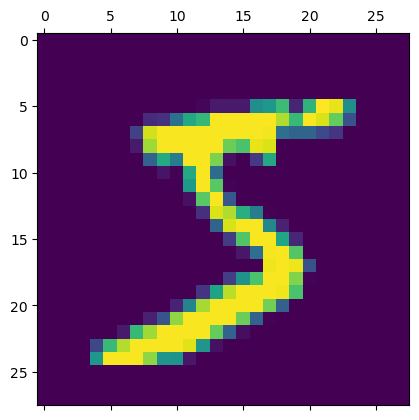

In [9]:
plt.matshow(x_train[0])

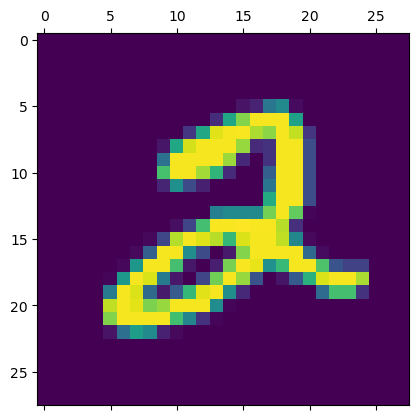

In [10]:
plt.matshow(x_train[5])

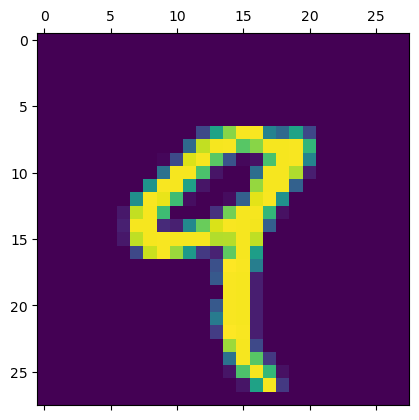

In [11]:
plt.matshow(x_train[4])

In [12]:
x_train = x_train / 255
x_test = x_test / 255

In [13]:
# Build simple artificial neural network for image classification
ann = models.Sequential([
        layers.Flatten(input_shape=(28,28)),
        layers.Dense(300, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7307 - loss: 1.0139
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9171 - loss: 0.2937
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9301 - loss: 0.2433
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9435 - loss: 0.1987
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9513 - loss: 0.1749


In [14]:
ann.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9448 - loss: 0.1856


[0.15975692868232727, 0.9534000158309937]

In [15]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.94      0.95      1032
           3       0.93      0.96      0.95      1010
           4       0.94      0.96      0.95       982
           5       0.96      0.93      0.94       892
           6       0.96      0.95      0.96       958
           7       0.96      0.95      0.95      1028
           8       0.93      0.95      0.94       974
           9       0.96      0.92      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



# Now let us build a convolutional neural network to train our images

In [16]:
cnn = models.Sequential([
    layers.Conv2D(filters=22, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.9043 - loss: 0.3177
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9842 - loss: 0.0504
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9894 - loss: 0.0327
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 13ms/step - accuracy: 0.9931 - loss: 0.0220
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9936 - loss: 0.0194
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.9962 - loss: 0.0123
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9967 - loss: 0.0106
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 12ms/step - accuracy: 0.9969 - loss: 0.0091
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9979 - loss: 0.0061
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9976 - loss: 0.0067


In [18]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9858 - loss: 0.0505


[0.03875984996557236, 0.9901999831199646]

In [19]:
y_pred = cnn.predict(x_test)
y_pred[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[5.63929632e-11, 1.58401969e-09, 8.29913482e-12, 2.43857592e-08,
        1.36767975e-08, 7.21938243e-13, 7.77340069e-17, 9.99999881e-01,
        1.07831420e-12, 1.13349238e-07],
       [8.83353390e-09, 6.52806048e-05, 9.99934673e-01, 4.00195935e-13,
        7.40050568e-15, 6.58746457e-17, 6.89611671e-13, 7.33456958e-12,
        9.59991548e-12, 1.79962856e-13],
       [1.62079933e-11, 9.99999642e-01, 1.66229476e-12, 2.17868004e-14,
        3.70252565e-07, 2.52740726e-08, 2.27303246e-12, 7.53962848e-09,
        1.20561716e-09, 7.69771399e-12],
       [1.00000000e+00, 5.97506189e-14, 3.62458517e-13, 8.23525796e-12,
        8.21487572e-13, 7.73142439e-09, 5.35228892e-08, 7.42089307e-11,
        3.10509223e-11, 5.54424417e-09],
       [4.14484808e-10, 5.44936535e-12, 3.10996752e-13, 2.38183869e-14,
        9.99998093e-01, 4.20956109e-12, 1.48377003e-12, 6.93661170e-11,
        3.15973664e-10, 1.92108314e-06],
       [2.57178254e-11, 1.00000000e+00, 1.41546703e-12, 9.19004405e-15,
   

In [20]:
# Predicted output 
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [21]:
# Output
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

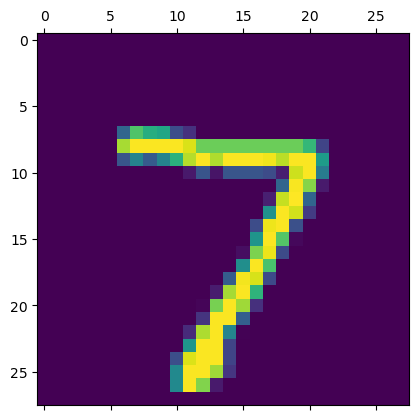

In [22]:
plt.matshow(x_test[0])

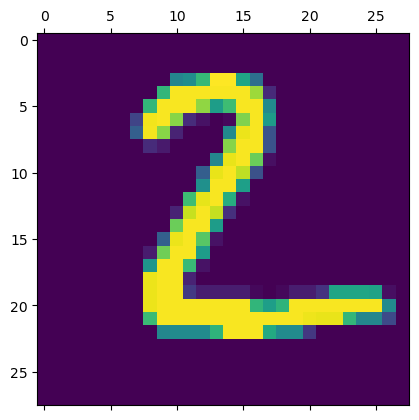

In [23]:
plt.matshow(x_test[1])

In [28]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Cm \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Cm 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

